In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv('../input/digit-recognizer/train.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test=pd.read_csv('../input/digit-recognizer/test.csv')
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train.shape

(42000, 785)

In [5]:
train.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [6]:
test.columns

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

In [7]:
l=train['label']
train_df=train.drop("label", axis=1)

In [8]:
l.shape

(42000,)

In [9]:
train_df.shape

(42000, 784)

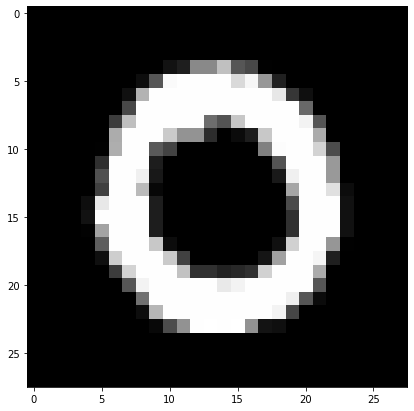

0


In [12]:
plt.figure(figsize=(7,7))
idx = 1

grid_data = train_df.iloc[idx].to_numpy().reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print(l[idx])

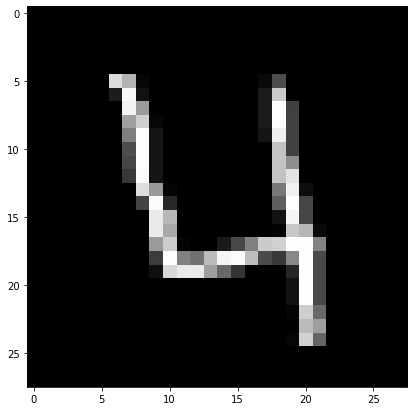

4


In [14]:
plt.figure(figsize=(7,7))
idx = 3

grid_data = train_df.iloc[idx].to_numpy().reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print(l[idx])

# 2D Visualization using PCA

In [16]:
#taking the first 15k data-point  
labels=l.head(15000)
data=train_df.head(15000)


In [18]:
# Data-preprocessing: Standardizing the data

from sklearn.preprocessing import StandardScaler
standarized_data=StandardScaler().fit_transform(data)
print(standarized_data.shape)

(15000, 784)


In [19]:
sample_data=standarized_data

covar_matrix=np.matmul(sample_data.T,sample_data)

print("the shape of variance matrix",covar_matrix.shape)

the shape of variance matrix (784, 784)


# finding the top two eigen-values and corresponding eigen-vectors 
# for projecting onto a 2-Dim space.


In [20]:
from scipy.linalg import eigh

# the parameter 'eigvals' is defined (low value to heigh value) 
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783) eigenvalues.

values, vectors=eigh(covar_matrix, eigvals=(782,783))

print("Shape of eigen values", vectors.shape)
vectors=vectors.T

print("updated shape of eigen vector", vectors.shape)



Shape of eigen values (784, 2)
updated shape of eigen vector (2, 784)


# projecting the original data sample on the plane 
#formed by two principal eigen vectors by vector-vector multiplication.

# appending label to the 2d projected data


In [34]:
import matplotlib.pyplot as plt
new_coordinates = np.matmul(vectors, sample_data.T)

print (" resultanat new data points' shape ", vectors.shape, "X", sample_data.T.shape," = ", new_coordinates.shape)

 resultanat new data points' shape  (2, 784) X (784, 15000)  =  (2, 15000)


In [35]:

# appending label to the 2d projected data
new_coordinates = np.vstack((new_coordinates, labels)).T

# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -5.558661      -5.043558    1.0
1       6.193635      19.305278    0.0
2      -1.909878      -7.678775    1.0
3       5.525748      -0.464845    4.0
4       6.366527      26.644289    0.0


In [38]:
df=pd.DataFrame()
df["1st"]=[-5.558661,-5.043558,6.193635 ,19.305278]
df["2nd"]=[-1.558661,-2.043558,2.193635 ,9.305278]
df['label']=[1,2,3,4]

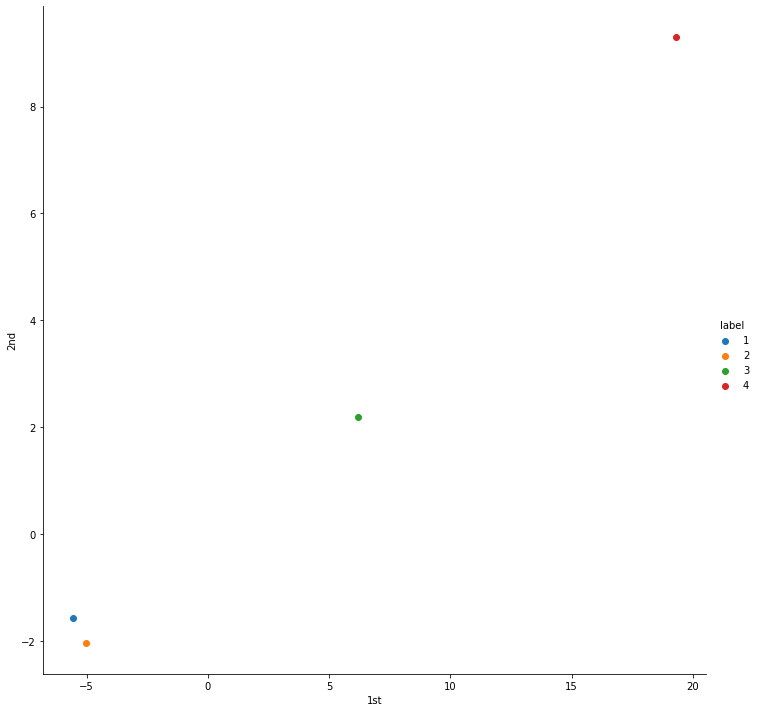

In [40]:
import seaborn as sns
sns.FacetGrid(df, hue="label", size=10).map(plt.scatter,'1st','2nd').add_legend()
plt.show()

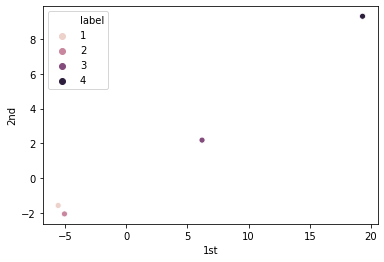

In [42]:
sns.scatterplot(x="1st",y="2nd",hue="label", data=df)

# ploting the 2d data points with seaborn


In [43]:
import seaborn as sns

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


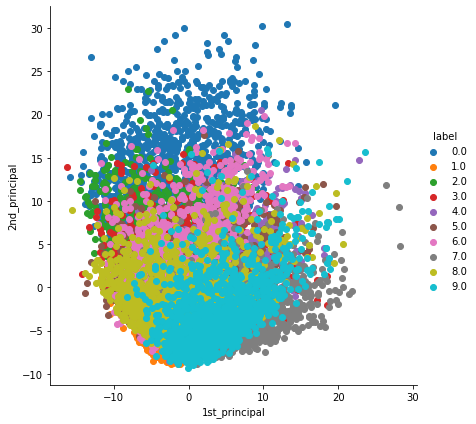

In [44]:
sns.FacetGrid(dataframe,hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

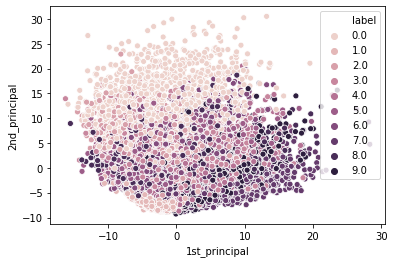

In [45]:
sns.scatterplot(x="1st_principal", y="2nd_principal", legend="full", hue="label", data=dataframe)

# PCA using Scikit-Learn¶


In [46]:
# initializing the pca

from sklearn import decomposition 
pca=decomposition.PCA()

In [47]:
# configuring the parameteres
# the number of components = 2

pca.n_components=2
pca_data=pca.fit_transform(sample_data)

print("shape of PCA reduced shape", pca_data.shape)

shape of PCA reduced shape (15000, 2)


# t-SNE using Scikit-Learn¶


/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


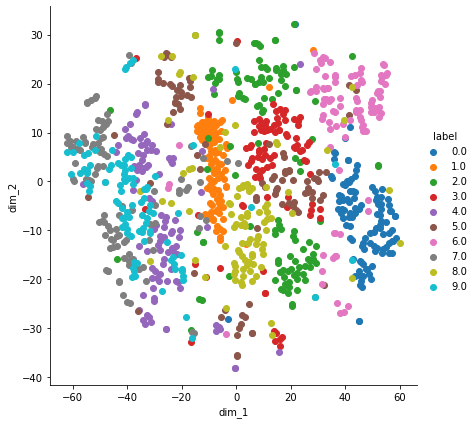

In [59]:
from sklearn.manifold import TSNE

data_1000=standarized_data[0:1000,:]
label_1000=labels[0:1000]

model=TSNE(n_components=2,random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data=model.fit_transform(data_1000)

tsne_data=np.vstack((tsne_data.T, label_1000)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=("dim_1","dim_2", "label"))

sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, "dim_1","dim_2").add_legend()
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


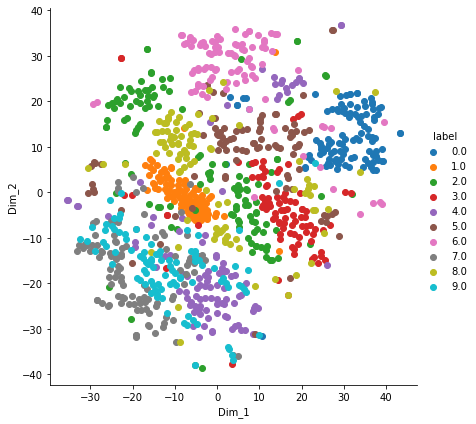

In [61]:
model=TSNE(n_components=2, random_state=0, perplexity=50)
tsne_data=model.fit_transform(data_1000)

# creating a new data fram which help us in ploting the result data
tsne_data=np.vstack((tsne_data.T, label_1000)).T
tsne_df=pd.DataFrame(data=tsne_data, columns=("Dim_1","Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter,"Dim_1","Dim_2").add_legend()
plt.show()

# Change perplexity value

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


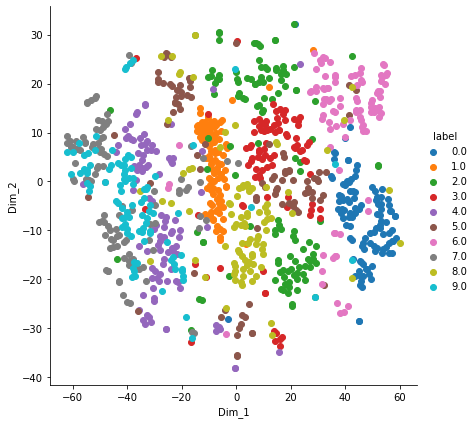

In [62]:
#with different perplexity
model=TSNE(n_components=2, random_state=0, perplexity=30)
tsne_data=model.fit_transform(data_1000)

# creating a new data fram which help us in ploting the result data
tsne_data=np.vstack((tsne_data.T, label_1000)).T
tsne_df=pd.DataFrame(data=tsne_data, columns=("Dim_1","Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter,"Dim_1","Dim_2").add_legend()
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


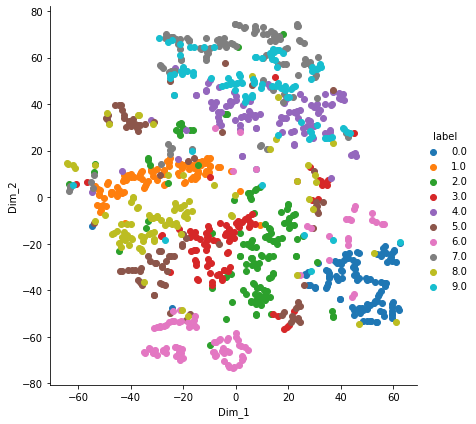

In [63]:
#with different perplexity
model=TSNE(n_components=2, random_state=0, perplexity=10)
tsne_data=model.fit_transform(data_1000)

# creating a new data fram which help us in ploting the result data
tsne_data=np.vstack((tsne_data.T, label_1000)).T
tsne_df=pd.DataFrame(data=tsne_data, columns=("Dim_1","Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter,"Dim_1","Dim_2").add_legend()
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


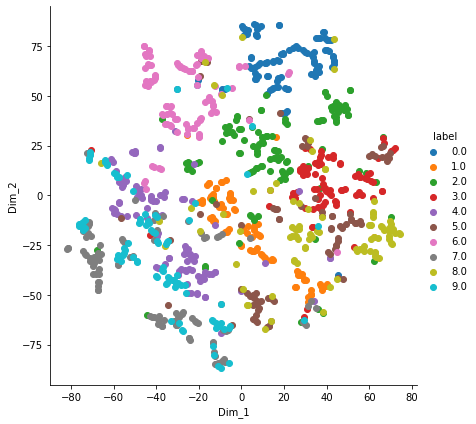

In [64]:
#with different perplexity
model=TSNE(n_components=2, random_state=0, perplexity=5)
tsne_data=model.fit_transform(data_1000)

# creating a new data fram which help us in ploting the result data
tsne_data=np.vstack((tsne_data.T, label_1000)).T
tsne_df=pd.DataFrame(data=tsne_data, columns=("Dim_1","Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter,"Dim_1","Dim_2").add_legend()
plt.title("With Perplexity 5")

plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


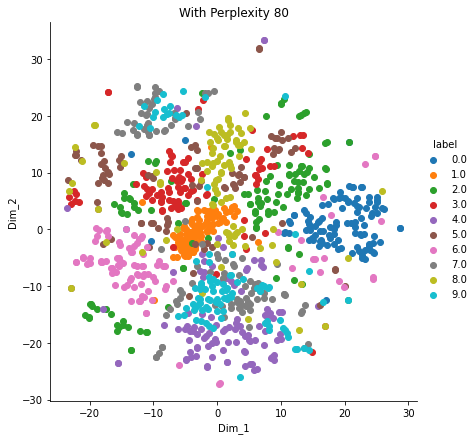

In [ ]:
#with different perplexity
model=TSNE(n_components=2, random_state=0, perplexity=80)
tsne_data=model.fit_transform(data_1000)

# creating a new data fram which help us in ploting the result data
tsne_data=np.vstack((tsne_data.T, label_1000)).T
tsne_df=pd.DataFrame(data=tsne_data, columns=("Dim_1","Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter,"Dim_1","Dim_2").add_legend()
plt.title("With Perplexity 80")
plt.show()